### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from nltk.tokenize import word_tokenize
from string import punctuation
#nltk.download('punkt')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import re
import os

### Set path for all data folder

In [3]:
path = "E:\Projects\Ex\document_data"
folders = os.listdir(path)

### create labels for each folder

In [4]:
class_labels = {}
for idx, folder in enumerate(folders):
    #print(idx, folder)
    if folder == 'notes.txt':
        continue
    class_labels[folder] = idx
print(class_labels)

{'Chinh tri Xa hoi': 0, 'Doi song': 1, 'Khoa hoc': 2, 'Kinh doanh': 3, 'Phap luat': 5, 'Suc khoe': 6, 'The gioi': 7, 'The thao': 8, 'Van hoa': 9, 'Vi tinh': 10}


### Function to extract text 

In [5]:
path_ex = "E:\Projects\Ex\document_data\Chinh tri Xa hoi\XH_NLD_ (3672).txt"

def read_extract_text_file(path):
    with open(path, 'r', encoding='utf-16') as file:
        data = file.readlines()
        text_data = " ".join(data)
    return text_data

text = read_extract_text_file(path_ex)
print(text)


 Thành lập dự án POLICY phòng chống HIV/AIDS ở VN (NLĐ)- Quỹ hỗ trợ khẩn cấp về AIDS của Hoa Kỳ vừa thành lập dự án POLICY tại VN với cam kết hỗ trợ Chính phủ và nhân dân VN đối phó HIV/AIDS.Dự án có nhiệm vụ chính là cải thiện công tác phòng chống HIV/AIDS thông qua các lĩnh vực xây dựng chính sách, rà soát các văn bản pháp luật, xây dựng chiến lược quảng bá, xây dựng chương trình đào tạo về phòng chống HIV/AIDS, lên kế hoạch bố trí nguồn lực, huấn luyện và nghiên cứu về phương tiện truyền thông đại chúng, tổ chức các hoạt động nhằm giảm kỳ thị và phân biệt đối xử đối với người có HIV/AIDS... Theo TTXVN, dự án POLICY đặc biệt quan tâm đến công tác truyền thông phòng chống HIV/AIDS, coi đây là một biện pháp tích cực và hữu hiệu trong việc phòng chống có hiệu quả HIV/AIDS. Thời gian tới, dự án POLICY sẽ tiếp tục tổ chức các hoạt động nhằm nâng cao nhận thức cho những người có trách nhiệm với công tác chỉ đạo phòng chống HIV/AIDS.
 



### Join all data and label them

In [47]:
final_text = []
final_label = []
path = "E:\Projects\Ex\document_data"

for label in folders:
    label_path = os.path.join(path,label)
    if label_path.endswith("notes.txt"):
        continue
    else:
        for j in os.listdir(label_path):
            print(j)
            txt_path = os.path.join(label_path,j)
            text = read_extract_text_file(txt_path)
            final_text.append(text)
            final_label.append(class_labels[label])
# it takes about 6 to 7 minutes to run

XH_NLD_ (3672).txt
XH_NLD_ (3673).txt
XH_NLD_ (3674).txt
XH_NLD_ (3675).txt
XH_NLD_ (3676).txt
XH_NLD_ (3677).txt
XH_NLD_ (3678).txt
XH_NLD_ (3679).txt
XH_NLD_ (3680).txt
XH_NLD_ (3681).txt
XH_NLD_ (3682).txt
XH_NLD_ (3683).txt
XH_NLD_ (3684).txt
XH_NLD_ (3685).txt
XH_NLD_ (3686).txt
XH_NLD_ (3687).txt
XH_NLD_ (3688).txt
XH_NLD_ (3689).txt
XH_NLD_ (3690).txt
XH_NLD_ (3691).txt
XH_NLD_ (3692).txt
XH_NLD_ (3693).txt
XH_NLD_ (3694).txt
XH_NLD_ (3695).txt
XH_NLD_ (3696).txt
XH_NLD_ (3697).txt
XH_NLD_ (3698).txt
XH_NLD_ (3699).txt
XH_NLD_ (3700).txt
XH_NLD_ (3701).txt
XH_NLD_ (3702).txt
XH_NLD_ (3703).txt
XH_NLD_ (3704).txt
XH_NLD_ (3705).txt
XH_NLD_ (3706).txt
XH_NLD_ (3707).txt
XH_NLD_ (3708).txt
XH_NLD_ (3709).txt
XH_NLD_ (3710).txt
XH_NLD_ (3711).txt
XH_NLD_ (3712).txt
XH_NLD_ (3713).txt
XH_NLD_ (3714).txt
XH_NLD_ (3715).txt
XH_NLD_ (3716).txt
XH_NLD_ (3717).txt
XH_NLD_ (3718).txt
XH_NLD_ (3719).txt
XH_NLD_ (3720).txt
XH_NLD_ (3721).txt
XH_NLD_ (3722).txt
XH_NLD_ (3723).txt
XH_NLD_ (372

In [49]:
print(len(final_text))
print(len(final_label))

33759
33759


### Convert them into DataFrame and save into csv file

In [48]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df.head()

,Text,Label
0,Thành lập dự án POLICY phòng chống HIV/AIDS ở...,0
1,Hơn 16.000 khách đến vịnh Nha Trang Theo trực...,0
2,TPHCM: Khai trương dịch vụ lặn biển săn cá mậ...,0
3,Du lịch VN sẽ có tư vấn nước ngoài Ông Phạm T...,0
4,Quy chế tuyển sinh 2006: Không làm tròn điểm ...,0


In [50]:
df.to_csv("all_document_data.csv",index=False)

In [6]:
df = pd.read_csv('all_document_data.csv')
df.head()

,Text,Label
0,Thành lập dự án POLICY phòng chống HIV/AIDS ở...,0
1,Hơn 16.000 khách đến vịnh Nha Trang Theo trực...,0
2,TPHCM: Khai trương dịch vụ lặn biển săn cá mậ...,0
3,Du lịch VN sẽ có tư vấn nước ngoài Ông Phạm T...,0
4,Quy chế tuyển sinh 2006: Không làm tròn điểm ...,0


In [7]:
df['Label'].value_counts().sort_index()

Label
0     5219
1     3159
2     1820
3     2552
5     3868
6     3384
7     2898
8     5298
9     3080
10    2481
Name: count, dtype: int64

### Exploration Data Analysis

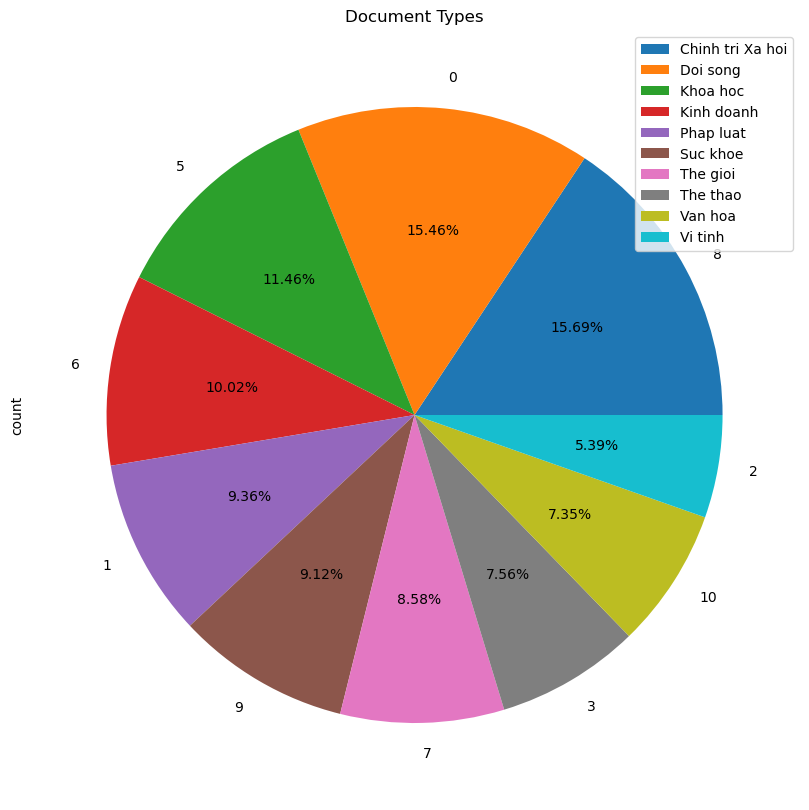

In [8]:
plt.figure(figsize=(10, 10))
df['Label'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title("Document Types")
plt.legend(class_labels.keys())
plt.show()

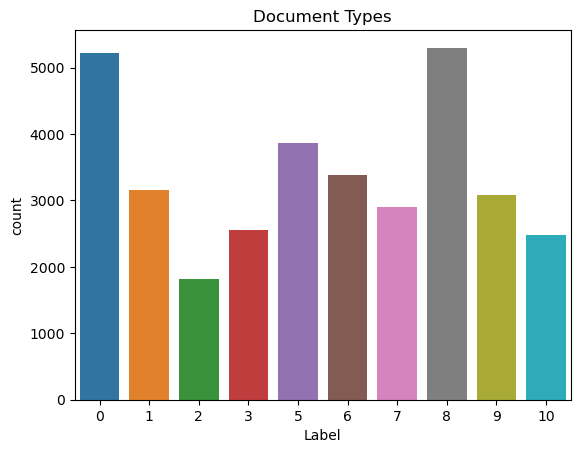

In [9]:
sns.countplot(data=df, x=df['Label'])
plt.title("Document Types")
plt.show()

### Data Preprocessing

In [10]:
# read all vietnamese stopwords from file
def read_stopwords(path):
    with open(path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stopwords_file_path = 'E:\Projects\Ex\stopwords_vn.txt'
stopwords_list = read_stopwords(stopwords_file_path)

print(stopwords_list)
print(len(stopwords_list))

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [11]:
# All text is kind of clean
import re
def preprocess_data(text):
    text = text.lower()
    text = re.sub("\s+"," ",text)

    # tokens
    tokens = word_tokenize(text)
    
    # remove punctuation and stopword
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)

In [12]:
x_train, x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],test_size=0.2, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23631,)
(10128,)
(23631,)
(10128,)


In [13]:
x_train

9491     Chocolate bọc giấy màu lục đắt hàng nhất \n Lớ...
31908     Windows Live Video - Dịch vụ Live kế tiếp của...
9609     Đóng băng người - giải pháp để chinh phục vũ t...
30253    Hoa hậu Thế giới: 'Tôi không bao giờ đánh mất ...
26669     Strachan: HLV xuất sắc nhất Scotland\n Ông St...
                               ...                        
5724     Chị Hoài hãy tự hỏi chính mình\n Chị Hoài có l...
28884    Kitaro là một gương mặt khá quen thuộc với ngư...
11650    ETC chuẩn bị cung cấp dịch vụ Internet\n Ông H...
12324     Nhiều nhà đầu tư sản xuất giống thủy sản (NLĐ...
8636     Kỹ thuật test nhanh hóa chất tại hiện trường v...
Name: Text, Length: 23631, dtype: object

In [14]:
y_train

9491      2
31908    10
9609      2
30253     9
26669     8
         ..
5724      1
28884     9
11650     3
12324     3
8636      2
Name: Label, Length: 23631, dtype: int64

In [15]:
clean_train = x_train.apply(preprocess_data)
clean_test = x_test.apply(preprocess_data)
# it takes about 7 minutes to run

In [16]:
clean_train

9491     chocolate bọc giấy màu lục đắt hàng lớp áo bọc...
31908    window live video dịch vụ live kế tiếp microso...
9609     đóng băng giải pháp chinh phục vũ trụ tưởng ``...
30253    hoa hậu giới 'tôi bao đánh hy vọng `` nuôi dưỡ...
26669    strachan hlv xuất sắc scotland strachan cựu hl...
                               ...                        
5724     hoài hoài liên lạc quan trọng đạo đức kia hoài...
28884    kitaro gương mặt quen yêu nhạc yêu ... thời tr...
11650    etc chuẩn cung dịch vụ internet hoàng văn nhuầ...
12324    đầu tư sản xuất thủy sản nlđ 6-4 lưu xuân vĩnh...
8636     kỹ thuật test hóa chất hiện trường vụ án kỹ th...
Name: Text, Length: 23631, dtype: object

In [17]:
clean_test

29353    tác phẩm văn học nhi `` văn hóa đọc nhi trầm t...
25981    thủ môn jerome alonzo psg thể sân vòng 2 tuần ...
24440    chủ mặt pháp tưởng chừng trải 18-1 tồi tệ 3 hạ...
11141    hiệp định ký kết asean 10 tổng thư ký asean on...
25463    bắt mấy làng bóng đá rúng động rúng động dội c...
                               ...                        
24502    lyon thức vô đich pháp lễ mừng ngỗ nghĩnh cầu ...
11345    bổ sung công cụ bảo hiểm dự trữ ngoại hối thốn...
19181    vận động tuần nghỉ ngơi khoẻ eo hẹp thời gian ...
843      mít tinh kỷ niệm thành lập đảng nlđ 23-1 ủy hđ...
15975    tội danh đồng phạm hùng “ xì – tẹc ” trình thẩ...
Name: Text, Length: 10128, dtype: object

### WordCloud

In [18]:
def generate_wordcloud(data,column):
    str_text=data[column].str.cat(sep=" ")
    wordcloud=WordCloud(width=500,height=300,background_color='Gold').generate(str_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

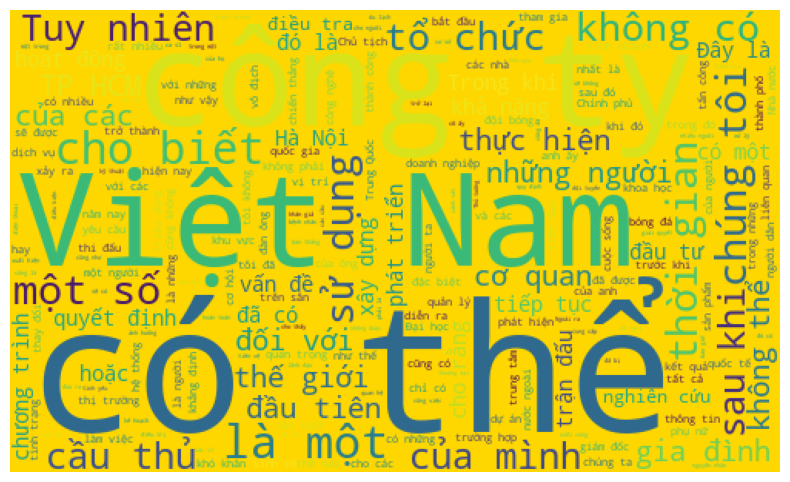

In [19]:
generate_wordcloud(df,"Text")

### term frequency – inverse document frequency (TF-IDF)

In [20]:
tfidf = TfidfVectorizer(ngram_range=(1,5),max_df=0.95, max_features=15000)
tfidf_train = tfidf.fit_transform(clean_train)
tfidf_test = tfidf.transform(clean_test)

### A is sparse matrix - Tf-idf-weighted document-term matrix.

In [21]:
tfidf_train.A.shape

(23631, 15000)

In [22]:
tfidf_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01627809, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### LogisicRegression Model

In [23]:
lg_model = LogisticRegression()
lg_model.fit(tfidf_train, y_train)

LogisticRegression()

In [24]:
y_pred = lg_model.predict(tfidf_test)
y_pred

array([9, 8, 8, ..., 6, 0, 5], dtype=int64)

In [25]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
print(f"Accuracy On Test Data: {accuracy_score(y_test,y_pred)*100:.2f}")

Confusion Matrix:
 [[1352   44   12   40   66   32    7    4    9    4]
 [  43  856   10    3    4   16    9   10   20    6]
 [  23   21  453    3    0   29    6    0    4    9]
 [  56    5    0  655   13    0    4    1    1    9]
 [  71    5    1    4 1051    7    3    5    4    4]
 [  16   16    8    3    0  946    3    1    1    0]
 [  18   11    5   10   11   16  818    1    9    7]
 [   5    3    0    1    7    0    4 1593    7    1]
 [  28   22    8    1    3    2   11    1  798    0]
 [  21    2   13    8    3    4    8    0    4  676]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1570
           1       0.87      0.88      0.87       977
           2       0.89      0.83      0.86       548
           3       0.90      0.88      0.89       744
           5       0.91      0.91      0.91      1155
           6       0.90      0.95      0.92       994
           7       0.94      0.90      0.92   

In [26]:
labels = list(class_labels.keys())
labels

['Chinh tri Xa hoi',
 'Doi song',
 'Khoa hoc',
 'Kinh doanh',
 'Phap luat',
 'Suc khoe',
 'The gioi',
 'The thao',
 'Van hoa',
 'Vi tinh']

In [27]:
def predict_result(path):
    text_data = read_extract_text_file(path)
    clean_text_data = preprocess_data(text_data)
    
    tfidf_data = tfidf.transform([clean_text_data])
    y_pred = lg_model.predict(tfidf_data.A)
    result = f"Given Document Is Related To : {labels[y_pred[0]]}"
    return result

In [28]:
# Doan trich tu VNexpress thuoc linh vuc kinh doanh
path_test = "E:\Projects\Ex\ex.txt"
predict_result(path_test)

'Given Document Is Related To : Kinh doanh'